1\. Write a function that converts number representation (bin<->dec<->hex)

In [10]:
def converter():
    x=input("Enter the number to convert (first bit referred to the sign): ")
    bi=int(input("Enter the base (from 2 to 16) of the written number:"))
    x=x.upper()
    xl=[n for n in x]
    for n, i in enumerate(xl):
        if i == "A":
            xl[n] = 10
        elif i=="B":
            xl[n] = 11
        elif i=="C":
            xl[n] = 12
        elif i=="D":
            xl[n]=13
        elif i=="E":
            xl[n]=14
        elif i=="F":
            xl[n]=15
        else:
            xl[n]=int(xl[n])
    xl.reverse()
    ci=int(input("Enter the desired base (from 2 to 16) for the converted number: "))
    
    d=0
    for i in range(0,len(xl)-1): #NB range(i, f) si ferma a f-1
        d+=xl[i]*bi**(i)
    
    dd=d
    bh=[]
    
    
    while dd>0:
        r=dd%ci
        bh.append(r)
        dd = dd//ci
        
        
    for n, i in enumerate(bh):
        if i == 10:
            bh[n] = "A"
        elif i==11:
            bh[n] = "B"
        elif i==12:
            bh[n] = "C"
        elif i==13:
            bh[n]="D"
        elif i==14:
            bh[n]="E"
        elif i==15:
            bh[n]="F"
        else:
            bh[n]=int(bh[n])
            
    bh.append(xl[len(xl)-1])
    bh.reverse()  
    stringbh = [str(val) for val in bh]
    
    
    if not ci==10:
        print("The converted number is: {}".format("".join(stringbh)))
            
    if ci==10:
        print("The converted number is: {}".format(d*(-1)**xl[len(xl)-1]))
        
converter()

Enter the number to convert (first bit referred to the sign): 0124df
Enter the base (from 2 to 16) of the written number:16
Enter the desired base (from 2 to 16) for the converted number: 11
Il numero convertito è: 05136A


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [11]:
 #e.g.  00000011111000000000000000000000  ->  1.316553672920962e-36
def converter32():
    x=input("Enter the 32 bit number you want to convert: ")
    xl=[int(n) for n in x]
    xl.reverse()
    
    m=1
    for i in range(0,23):
        m+=xl[22-i]*2**(-i-1)
    
        
    e=0    
    for n in range(23,31):
        e+=xl[n]*2**(n-23)
        
        
        
    xfloat=(-1)**xl[31]*m*2**(e-127)
    
    print("The converted number is: {}".format(xfloat))
    
converter32() 

Enter the 32 bit number you want to convert: 00000011111000000000000000000000
The converted number is: 1.316553672920962e-36


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [17]:
u=1
i=0
while u>0:
    d=u
    u=u/2
    i+=1
    
print("After {} iterations the underflow limit is reached as: {}".format(i, d))    


a=True
o=1
n=0
while a:
    o=o*2
    n+=1
    try:
        float(o)==float(o)
    except:
        print("After {} iterations the overflow limit is reached as: {}".format(n, o))
        break



After 1075 iterations the underflow limit is reached as: 5e-324
After 1024 iterations the overflow limit is reached as: 179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137216


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [21]:
#Rivedere meglio!
i=0
a=1
b=0
n=1
while a!=b:
        i+=1
        a=b
        d=n
        n=n/10
        b=a+n

print("The determined machine precision in order of 10 is: {}".format(d))

The determined machine precision in order of 10 is: 1e-17


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [16]:
#rivedere e rispondere alle domande!

import math as m

def roota(a=0.001, b=1000, c=0.001):
    x1=(-b+m.sqrt(b**2-4*a*c))/(2*a)
    x2=(-b-m.sqrt(b**2-4*a*c))/(2*a)
    return(x1, x2)

print("The roots computed with the first function are: {}".format (roota()))

def rootb(a=0.001, b=1000, c=0.001):
    x1=(2*c)/((-b-m.sqrt(b**2-4*a*c)))
    x2=(2*c)/((-b+m.sqrt(b**2-4*a*c)))
    return(x1, x2)

print("The roots computed with the second function are: {}".format (rootb()))

def rootc(a=0.001, b=1000, c=0.001):
    x1=(2*c)/((-m.sqrt(b**2-4*a*c)-b))
    x2=c/(a*x1)
    return(x1, x2)

print("The roots computed with the third function are: {}".format (roota()))


a=c=0.001
b=1000
x1, x2=rootc()
d2=a*x2**2+b*x2+c
d1=a*x1**2+b*x1+c

print("The last function is the best one in fact, substituting the calculated roots in the initial equation, we can find the solutions nearer to zero: \n x1-> {} \n x2-> {}".format(d1, d2))


The roots computed with the first function are: (-9.999894245993346e-07, -999999.999999)
The roots computed with the second function are: (-1.000000000001e-06, -1000010.5755125057)
The roots computed with the third function are: (-9.999894245993346e-07, -999999.999999)
The last function is the best one in fact, substituting the calculated roots in the initial equation, we can find the solutions nearer to zero: 
 x1-> 0.0 
 x2-> -4.6730041503885433e-08


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

The derivative calculated with δ=0.01 is: 1.010000000000001 
The derivative calculated with δ=0.0001 is: 1.0000999999998899 
The derivative calculated with δ=1e-06 is: 1.0000009999177333 
The derivative calculated with δ=1e-08 is: 1.0000000039225287 
The derivative calculated with δ=1e-10 is: 1.000000082840371 
The derivative calculated with δ=1e-12 is: 1.0000889005833413 
The derivative calculated with δ=1e-14 is: 0.9992007221626509 


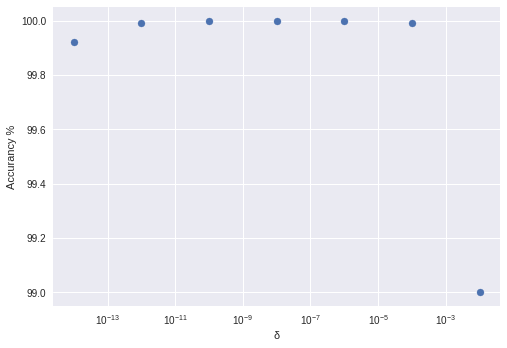

In [27]:
#rispondere alle domande

import matplotlib.pyplot as plt

def func(x):
    f=x*(x-1)
    return f

delta=1
deltalist=[]
accurancy=[]
for i in range(7):
    delta=delta/100
    deltalist.append(delta)
    der=(func(1+delta)-func(1))/delta
    print("The derivative calculated with \u03B4={} is: {} ".format(delta,der))
    accurancy.append((1-abs((der)-1))*100)
    
plt.scatter(deltalist, accurancy)
plt.xlabel("\u03B4")
plt.ylabel("Accurancy %")
plt.style.use('seaborn')
plt.xscale('log', base=10)
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [33]:
import math as m
import time



def I(N):
    h=2/N
    x=-1
    i=0
    for n in range(N):
        i+=h*m.sqrt(1-x**2)
        x=x+h
    return i

n1s=6500000
n1m=400000000

n=1
delta=0
a=100
while 0.1-delta>0.001:
    while delta<0.1:
        deltai=delta
        ni=n
        n=n*a
        start= time.time()
        i=I(n)
        end=time.time()
        delta=end-start
        #print(n)
        #print(delta)
        
    n=ni
    a=a/10
    delta=deltai

print(n)
print(i)
print(delta)

#I(100)

#%timeit for x in range(1,100): I(x)

print(I(n1s))
#print(I(n1m))

#%timeit I(n1s)
#%timeit I(n1m)

#x=timeit.repeat(stmt="I(100)", setup="from __main__ import I(N)",number=1)
#print(x)

TypeError: 'float' object cannot be interpreted as an integer